### Bag of N grams tutorial
Let's first understand how to generate n-grams using CountVectorizer


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [4]:
v = CountVectorizer(ngram_range=(1,1))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [5]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [6]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

##### We will  take a simple collection of text documents, preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it

In [7]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [8]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [9]:
preprocess("Thor ate pizza")


'thor eat pizza'

In [10]:
preprocess("Loki is eating pizza")


'Loki eat pizza'

In [11]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [12]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

#### Now generate bag of n gram vector for few sample documents



In [13]:
v.transform(["Thor eat pizza"]).toarray()


array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [14]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

###### News Category Classification Problem
Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1-BUSINESS

2-SPORTS

3-CRIME

4-SCIENCE

In [36]:
import pandas as pd

df = pd.read_json('News_Category_Dataset.json', lines=True)[['headline', 'category']]

print(df.shape)

df.head()

(209527, 2)


,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [37]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [41]:
# Select only rows where the category is in a list of desired values
desired_categories = ['CRIME', 'COMEDY', 'EDUCATION', 'SPORTS']
df_new = df[df['category'].isin(desired_categories)]
df_new.head()

,headline,category
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
61,Boston Marathon To Make Race More Inclusive Fo...,SPORTS
62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS


In [42]:
print(df_new.headline.shape)
print(df_new.category.shape)

(15053,)
(15053,)


In [43]:
df_new.category.value_counts()


COMEDY       5400
SPORTS       5077
CRIME        3562
EDUCATION    1014
Name: category, dtype: int64

In [44]:
min_samples = 1014 # we have these many EDUCATION articles 


df_business = df_new[df_new.category=="COMEDY"].sample(min_samples, random_state=2022)
df_sports = df_new[df_new.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df_new[df_new.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df_new[df_new.category=="EDUCATION"].sample(min_samples, random_state=2022)

In [45]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

COMEDY       1014
SPORTS       1014
CRIME        1014
EDUCATION    1014
Name: category, dtype: int64

In [48]:
#target = {'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'COMEDY': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'EDUCATION': 3
})

In [54]:
df_balanced.tail()


,headline,category,category_num
111169,The Global Search for Education: Our Global To...,EDUCATION,3
106643,Reflections of an Octogenarian IV: Whatever Ha...,EDUCATION,3
32087,"For The Future Of Education, Answer The Callin...",EDUCATION,3
37277,America's Charter Schools Have A Commitment Pr...,EDUCATION,3
125885,3 Tips for Using Video Interviews to Hire Grea...,EDUCATION,3


#### Build a model with original text (no pre processing)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.headline, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [66]:
print(X_train.shape)
X_train.head()

(3244,)


1506      Prosecution Rests In Sex-abuse Trial Of Ghisla...
92574     Jury Moves Closer To Death Penalty In James Ho...
47816     In A Crappy Year, These Sports Moments Brought...
92386     Shots Reported For 2nd Day At Mississippi Mili...
113680                              Stop Lying to Yourself!
Name: headline, dtype: object

In [67]:
y_train.value_counts()


2    811
1    811
3    811
0    811
Name: category_num, dtype: int64

In [69]:
y_test.value_counts()


1    203
3    203
2    203
0    203
Name: category_num, dtype: int64

##### Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model



In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))), #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       203
           1       0.82      0.79      0.80       203
           2       0.87      0.91      0.89       203
           3       0.84      0.89      0.86       203

    accuracy                           0.85       812
   macro avg       0.85      0.85      0.85       812
weighted avg       0.85      0.85      0.85       812



In [74]:
X_test[:8]
#target = {'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}


65762    11 Law Professors Say Tom Brady Is Right And T...
19832                  Florida's Teacher Gap Is No Mystery
85480    Richard Sherman Explains A Weekly Contradictio...
20592    Teacher Seniority: The Seat Belts Of The Educa...
95561    What to Watch for in the FIFA Case, Part 5: Va...
80283    Shoplifter Shot And Killed After Running Over ...
94008    F1 Driver Jules Bianchi Dies 9 Months After Su...
93093    Jen Welter To Become First Female Coach In NFL...
Name: headline, dtype: object

In [75]:
y_pred[:8]


array([1, 3, 1, 3, 3, 2, 2, 1], dtype=int64)

#### Attempt 2 : Use 1-gram and bigrams



In [76]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       203
           1       0.83      0.77      0.80       203
           2       0.87      0.92      0.89       203
           3       0.84      0.87      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



#### Attempt 3 : Use 1-gram to trigrams



In [77]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       203
           1       0.83      0.77      0.80       203
           2       0.86      0.92      0.89       203
           3       0.85      0.87      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



### Use text pre-processing to remove stop words, punctuations and apply lemmatization


In [78]:
df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess) 


In [79]:
df_balanced.head()


,headline,category,category_num,preprocessed_txt
15312,"Trevor Noah Calls Out Hillary Clinton, And He'...",COMEDY,0,Trevor Noah call Hillary Clinton joke
126777,What Sorcery Is This?,COMEDY,0,Sorcery
47238,"Hi, Death? I'd Like To Speak To Your Manager, ...",COMEDY,0,Hi Death like speak Manager
119663,...New Again?,COMEDY,0,New
30724,"There Was No Audio, So We Captioned The Trump ...",COMEDY,0,audio caption Trump Putin Meeting


##### Build a model with pre processed text



In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [81]:
print(X_train.shape)
X_train.head()

(3244,)


1506      prosecution Rests sex abuse Trial Ghislaine Ma...
92574      jury move close Death Penalty James Holmes Trial
47816                  Crappy Year Sports Moments bring Joy
92386         shot report 2nd Day Mississippi Military Site
113680                                             stop lie
Name: preprocessed_txt, dtype: object

In [82]:
y_train.value_counts()


2    811
1    811
3    811
0    811
Name: category_num, dtype: int64

In [83]:
y_test.value_counts()


1    203
3    203
2    203
0    203
Name: category_num, dtype: int64

In [84]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       203
           1       0.82      0.81      0.81       203
           2       0.86      0.92      0.89       203
           3       0.86      0.84      0.85       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



#### Plot confusion matrix



In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[160,  19,  10,  14],
       [ 15, 165,  15,   8],
       [  6,   5, 187,   5],
       [ 14,  13,   6, 170]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

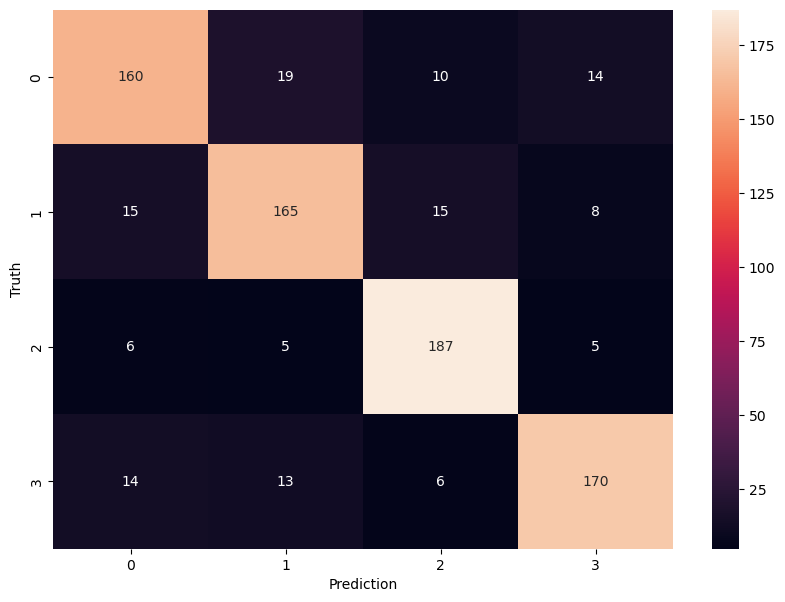

In [86]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
#target = {'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}
